# astrofy example time series sonification: NOTE: does not run on colab

In [1]:
!pip install astronify

In [2]:
!pip install lightkurve

In [3]:
from astronify.series import SoniSeries
import lightkurve
import matplotlib
import matplotlib.pyplot as plt


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [4]:
kep12b_lc = lightkurve.search_lightcurvefile("KIC 11804465", cadence="long", quarter=1).download_all()[0].SAP_FLUX.to_table()


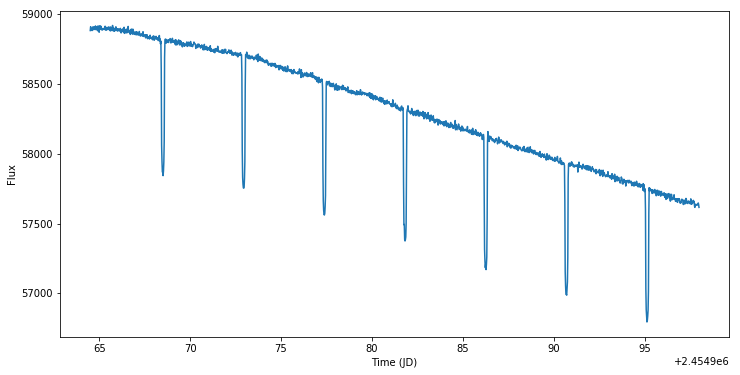

In [5]:
f, ax = plt.subplots(figsize=(12, 6))
ax.plot(kep12b_lc['time'].jd, kep12b_lc['flux'])
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Flux")

plt.show()

In [6]:
kep12b_obj = SoniSeries(kep12b_lc)

In [7]:
kep12b_obj.sonify()

/Users/fbb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [8]:
kep12b_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [10]:
kep12b_obj.stop()

In [11]:
#change pitch 
kep12b_obj.pitch_mapper.pitch_map_args["center_pitch"] = 880

kep12b_obj.sonify()
kep12b_obj.play()

/Users/fbb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [12]:
kep12b_obj.stop()
#reset
kep12b_obj.pitch_mapper.pitch_map_args["center_pitch"] = 440

In [13]:
#change pitch mapping
kep12b_obj.pitch_mapper.pitch_map_args["stretch"] = "log"

kep12b_obj.sonify()
kep12b_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [ ]:
kep12b_obj.stop()
#reset
kep12b_obj.pitch_mapper.pitch_map_args["stretch"] = "linear" 

In [14]:
#remove 5% outliers
kep12b_obj.pitch_mapper.pitch_map_args["minmax_percent"] = [0.5, 99.5]

kep12b_obj.sonify()
kep12b_obj.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [15]:
kep12b_obj.stop()
#reset

del kep12b_obj.pitch_mapper.pitch_map_args["minmax_percent"]


In [16]:
#save lightcurve
kep12b_obj.write("kepler_12b.wav")

Pyo message: Offline Server rendering file kepler_12b.wav dur=16.879996
Pyo message: Offline Server rendering finished.
